Deaths Per Day
            Daily Deaths Addition
Date                             
2021-02-25                 2411.0
2021-02-26                 2145.0
2021-02-27                 1536.0
2021-02-28                 1097.0
2021-03-01                 1566.0


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

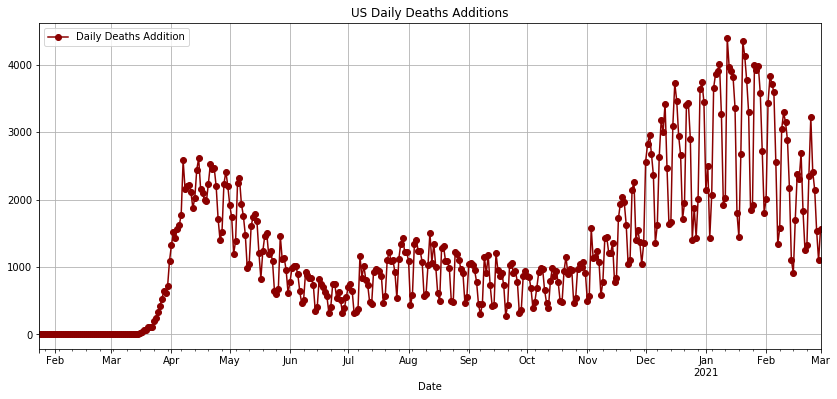

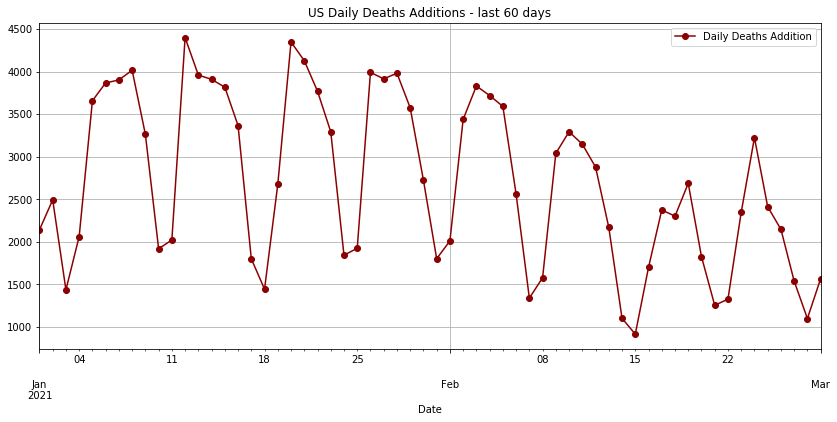

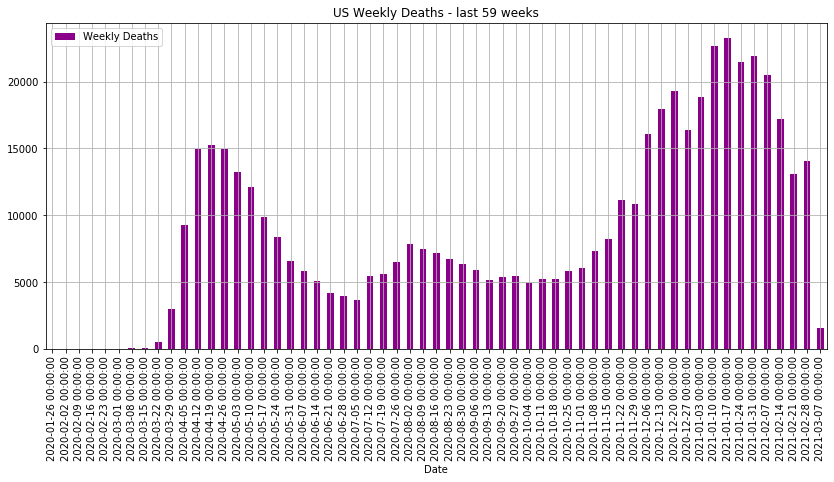

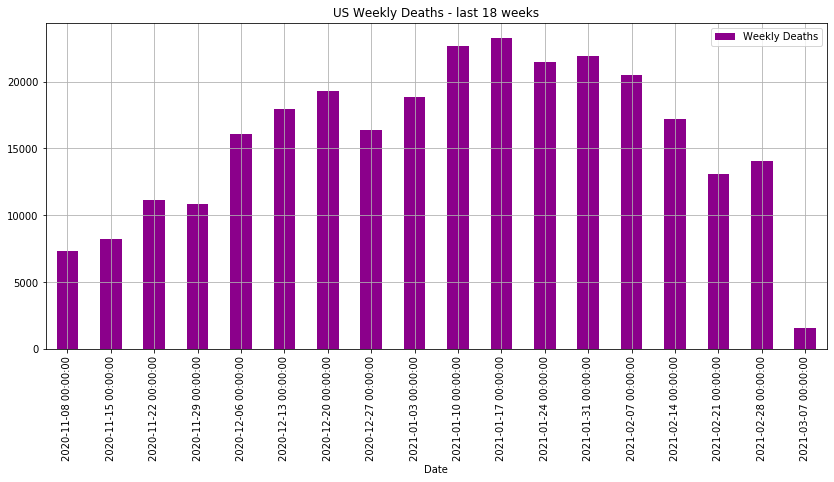

New Cases Per Day
            Daily Cases Addition
Date                            
2021-02-25               77291.0
2021-02-26               76791.0
2021-02-27               64286.0
2021-02-28               51204.0
2021-03-01               58812.0


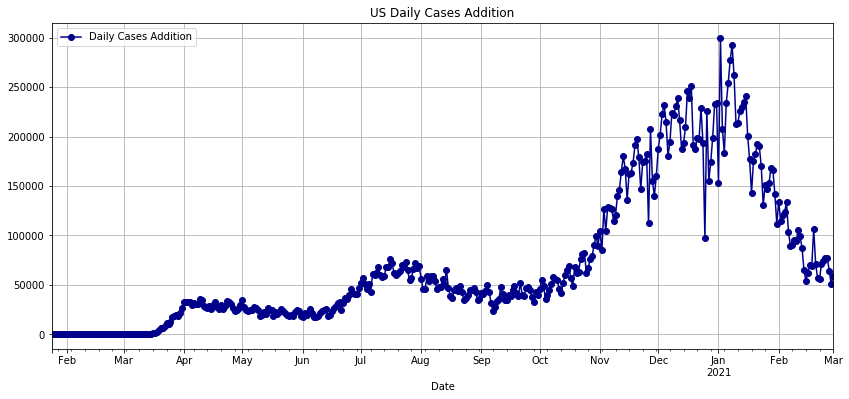

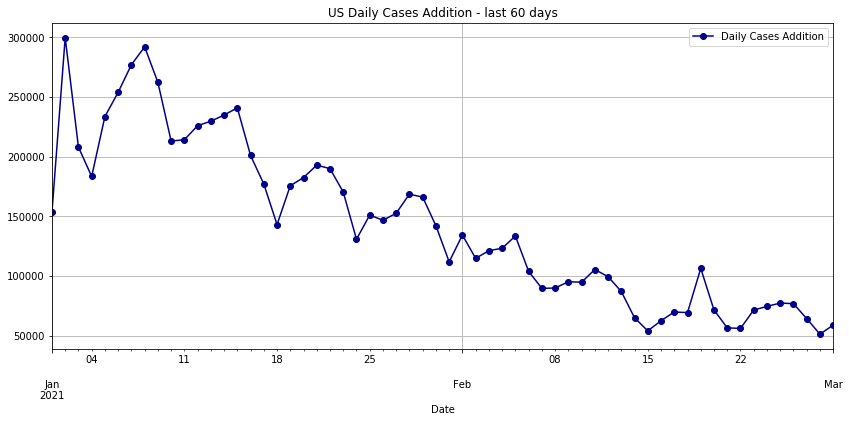

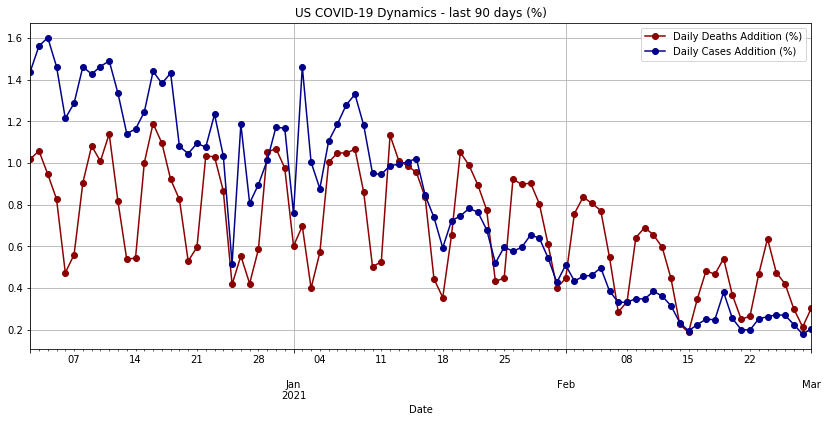

In [1]:
import covid_19_shared
covid_19_shared.Country_COVID19_Stats("US").show()

In [2]:
df = covid_19_shared.get_all_states_stats()

Getting population...
Getting list of states...
Getting USA data...
State                         New Conf. Conf./Popul.(%)     New Death Death/Popul.(%) 
Alabama                       517       10.330466           2         0.207773        
Alaska                        384       8.257454            10        0.042240        
Arizona                       1039      12.794412           -1        0.249984        
Arkansas                      94        11.060290           7         0.180046        
California                    6635      9.592401            333       0.140900        
Colorado                      1536      8.546873            1         0.118349        
Connecticut                   2680      7.907620            29        0.214068        
Delaware                      281       9.697817            0         0.158364        
District of Columbia          86        6.761251            2         0.169347        
Florida                       1700      10.163765           14

In [3]:
import pandas as pd
df["PopulShare"] =df.Population * 100 / df.Population.sum()

df["Confirmed"] = pd.Series(index=df.index, data=[(v.cv_data_.Confirmed[-1]) for v in df["Statistics"]])
df["OneDayConf"] = pd.Series(index=df.index
                             , data=[v.cv_data_.Confirmed[-1] - v.cv_data_.Confirmed[-2] 
                                     for v in df["Statistics"]])
df["OneWeekConfirmed"] = pd.Series(index=df.index, data=[(v.cv_data_.Confirmed[-1] - v.cv_data_.Confirmed[-8]) for v in df["Statistics"]])

df["ConfShare"] = df.Confirmed * 100 / df.Confirmed.sum()
df["NewConfShare"] = df.OneWeekConfirmed * 100 / df.OneWeekConfirmed.sum()  # using one week stats

df["Deaths"] = pd.Series(index=df.index, data=[(v.cv_data_.Dead[-1]) for v in df["Statistics"]])
df["OneDayDeaths"] = pd.Series(index=df.index, data=[v.cv_data_.Dead[-1] - v.cv_data_.Dead[-2] for v in df["Statistics"]])
df["OneWeekDeaths"] = pd.Series(index=df.index, data=[v.cv_data_.Dead[-1] - v.cv_data_.Dead[-8] for v in df["Statistics"]])

df["DeathsShare"] = df.Deaths * 100 / df.Deaths.sum()
df["NewDeathsShare"] = df.OneWeekDeaths * 100 / df.OneWeekDeaths.sum()
df["LastDayDeathsShare"] = df.OneDayDeaths * 100 / df.OneDayDeaths.sum()

# Indicator of intensity
# "Density" as ratio of value share to population share
df["CasesDensity"] = df.ConfShare / df.PopulShare
df["NewCasesDensity"] = df.NewConfShare / df.PopulShare

df["DeathsDensity"] = df.DeathsShare / df.PopulShare
df["NewDeathsDensity"] = df.NewDeathsShare / df.PopulShare


In [4]:
# df3 = df.copy()
# del df3["Statistics"]
df3 = df[[
          "OneWeekDeaths"
          , "OneDayDeaths"
          
          , "CasesDensity"
          , "NewCasesDensity"
          
          , "DeathsDensity"
          , "NewDeathsDensity"

          , "NewDeathsShare"
          , "LastDayDeathsShare"
         ]]
# dropping statistics column 
df4 = df3.sort_values("NewDeathsShare", ascending=False)
df4 = df3.sort_values("NewDeathsDensity", ascending=False)
# df4 = df3.sort_values("DeathsDensity", ascending=False)
# df4 = df3.sort_values("OneDayDeaths", ascending=False)
# df4 = df3.sort_values("OneWeekDeaths", ascending=False)
# df4 = df3.sort_values("DeathsDensity", ascending=False)
df4

,OneWeekDeaths,OneDayDeaths,CasesDensity,NewCasesDensity,DeathsDensity,NewDeathsDensity,NewDeathsShare,LastDayDeathsShare
State,,,,,,,,
Virginia,1297,231,0.786664,0.980290,0.666692,3.536722,9.055998,14.760383
California,2950,333,1.046057,0.647369,0.855738,1.727651,20.597682,21.277955
Arizona,477,-1,1.395238,0.860399,1.518238,1.628122,3.330540,-0.063898
Oklahoma,275,50,1.235136,0.884340,0.724978,1.599379,1.920123,3.194888
Alabama,339,2,1.126543,0.861418,1.261878,1.547399,2.366988,0.127796
Texas,1608,212,1.153924,1.422230,1.060524,1.395183,11.227482,13.546326
Delaware,54,0,1.057552,1.460213,0.961797,1.312066,0.377042,0.000000
Georgia,541,81,1.135414,1.470363,1.089330,1.218387,3.777405,5.175719
South Carolina,230,16,1.221214,1.764524,1.124236,1.084897,1.605921,1.022364
